In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 24
marker_size = 6

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "niid", #"dirichlet" "niid"
        'dataset': 'mnist', #cifar, mnist, synthetic
        'method': "BL", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10
        }

In [3]:
def give_filename(args):
    saveFileName = f"csv_res/M_effect_dataDistr_mnist_niid.csv"
    return saveFileName

def give_data(args):
    file_name = give_filename(args)
    iid_flag = 'd' if args['iid']=="diri" else 'n'
    lala = pd.read_csv(file_name)
    print(lala.columns)
    # case_names = [-1000, -10, 0, 10, 1000]
    case_names = [-10, 0, 10]
    key_names = [f"{iid_flag}Op_M_{lala}_DataDistr_label - accuracy" for lala in case_names]
    # key_names = [f"{iid_flag}Op_M_{lala}_v_1_thrU - accuracy" for lala in case_names]
    # key_names.append(f"{args['iid']}_WR_UE_500_Mnist_oldMLP - accuracy")
    # key_names.append(f"{iid_flag}WR_lUE_10_cellR_1000 - accuracy")
    key_names.append(f"{iid_flag}Op_M_10_v_1_thrU - accuracy")
    
    print(key_names)
    return lala[key_names]

lala =give_data(args)
lala

Index(['Step', 'nOp_M_10_DataDistr_label - accuracy',
       'nOp_M_10_DataDistr_label - accuracy__MIN',
       'nOp_M_10_DataDistr_label - accuracy__MAX',
       'nOp_M_0_DataDistr_label - accuracy',
       'nOp_M_0_DataDistr_label - accuracy__MIN',
       'nOp_M_0_DataDistr_label - accuracy__MAX',
       'nOp_M_-10_DataDistr_label - accuracy',
       'nOp_M_-10_DataDistr_label - accuracy__MIN',
       'nOp_M_-10_DataDistr_label - accuracy__MAX',
       'nOp_M_10_v_1_thrU - accuracy', 'nOp_M_10_v_1_thrU - accuracy__MIN',
       'nOp_M_10_v_1_thrU - accuracy__MAX'],
      dtype='object')
['nOp_M_-10_DataDistr_label - accuracy', 'nOp_M_0_DataDistr_label - accuracy', 'nOp_M_10_DataDistr_label - accuracy', 'nOp_M_10_v_1_thrU - accuracy']


,nOp_M_-10_DataDistr_label - accuracy,nOp_M_0_DataDistr_label - accuracy,nOp_M_10_DataDistr_label - accuracy,nOp_M_10_v_1_thrU - accuracy
0,20.450001,20.959999,18.639999,13.270000
1,20.930000,21.190001,20.680000,23.629999
2,21.400000,22.480000,21.680000,26.990000
3,29.459999,29.740000,29.350000,29.900000
4,23.049999,29.469999,28.750000,31.230000
...,...,...,...,...
795,92.739998,92.639999,92.760002,NaN
796,91.110001,91.290001,91.769997,NaN
797,91.150002,91.930000,91.860001,NaN
798,89.089996,89.769997,89.839996,NaN


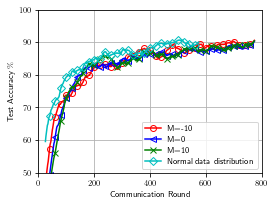

In [10]:
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
markers = ['o', '<','x','D','+', 'None']
line_style = ['-', '-', '-', '-','-', '--']
fig = plt.figure(figsize=[4,3])
ax = fig.add_subplot(111)
font_size = 8
marker_size = 6
window_size = 51
len_data = len(lala[lala.columns[0]].dropna())
# case_names = [-1000, -10, 0, 10, 1000]
case_names = [-10, 0, 10]
for nb_line, yoyo in enumerate(lala.columns):
    vec = lala[yoyo]
    vec = vec[:len_data]
    acc_smooth = vec.rolling(window_size, center = True).mean()#.dropna()
    acc_std = vec.rolling(window_size, center = True).std()#.dropna()
    plt.plot(acc_smooth, linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    # plt.plot(acc_std, linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    indvec = np.linspace(0, len_data, int(len_data/50)+1)
    indvec = indvec[:-1]
    # ax.errorbar(indvec,acc_smooth[indvec], yerr = acc_std[indvec],
    #             fmt='o', capsize=1,linewidth = 2, color = colors[nb_line])
# marker= markers[nb_line],markevery = 15, markeredgewidth = 1, fillstyle='none'
legend_names = [f"M={M_val}" for M_val in case_names]
legend_names.append('Normal data distribution')
plt.legend(legend_names,loc=0,prop={'size': font_size})
plt.grid()
plt.xlabel("Communication Round",fontsize=font_size)
plt.ylabel("Test Accuracy $\%$",fontsize=font_size)
plt.xticks(fontsize= font_size)
plt.yticks(fontsize= font_size)
plt.xlim([0,len_data])
# plt.ylim([5,60])
plt.ylim([50,100])


sub


# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
figure_folder = "./figures2/"
# plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+".pdf")
plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+"_dataDistr.pdf")


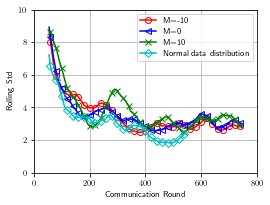

In [14]:
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
markers = ['o', '<','x','D','+', 'None']
line_style = ['-', '-', '-', '-','-', '--']
fig = plt.figure(figsize=[4,3])
ax = fig.add_subplot(111)
font_size = 8
marker_size = 6
window_size = 51
window_size2 = 61
len_data = len(lala[lala.columns[0]].dropna())
case_names = [ -10, 0, 10]
# case_names = [-1000, -10, 0, 10, 1000]
for nb_line, yoyo in enumerate(lala.columns):
    vec = lala[yoyo]
    vec = vec[:len_data]
    acc_smooth = vec.rolling(window_size, center = True).mean()#.dropna()
    acc_std = vec.rolling(window_size, center = True).std()#.dropna()
    acc_std_smooth = acc_std.rolling(window_size2, center = True).mean()
    plt.plot(acc_std_smooth , linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    indvec = np.linspace(0, len_data, int(len_data/50)+1)
    indvec = indvec[:-1]
    # ax.errorbar(indvec,acc_smooth[indvec], yerr = acc_std[indvec],
    #             fmt='o', capsize=1,linewidth = 2, color = colors[nb_line])
# marker= markers[nb_line],markevery = 15, markeredgewidth = 1, fillstyle='none'
legend_names = [f"M={M_val}" for M_val in case_names]
legend_names.append('Normal data distribution')
plt.legend(legend_names,loc=0,prop={'size': font_size})
plt.grid()
plt.xlabel("Communication Round",fontsize=font_size)
plt.ylabel("Rolling Std",fontsize=font_size)
plt.xticks(fontsize= font_size)
plt.yticks(fontsize= font_size)
plt.xlim([0,len_data])
# plt.ylim([0,30])
plt.ylim([0,10])

# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
figure_folder = "./figures2/"
# plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+".pdf")
plt.savefig(figure_folder+"Meffect_std_"+args['dataset']+"_"+args['iid']+"_dataDistr.pdf")
